In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [20]:
pd.set_option ('display.max_columns', None)
pd.set_option ('max_colwidth', 400)

# EDA

In [21]:
df=pd.read_csv('/kaggle/input/hr-analytics-dataset/HR_Analytics.csv')
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [22]:
df.shape

(1480, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [23]:
# persantage of nane in columns
df.isna().sum()*100/1480

EmpID                       0.000000
Age                         0.000000
AgeGroup                    0.000000
Attrition                   0.000000
BusinessTravel              0.000000
DailyRate                   0.000000
Department                  0.000000
DistanceFromHome            0.000000
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.000000
MonthlyIncome               0.000000
SalarySlab                  0.000000
MonthlyRate                 0.000000
NumCompaniesWorked          0.000000
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
P

In [9]:
df['YearsWithCurrManager'].describe()

count    1423.000000
mean        4.118060
std         3.555484
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [24]:
df['YearsWithCurrManager'].value_counts()

YearsWithCurrManager
2.0     330
0.0     253
7.0     211
3.0     139
8.0     100
4.0      95
1.0      76
9.0      61
5.0      31
6.0      30
10.0     27
11.0     21
12.0     17
13.0     14
17.0      6
15.0      5
14.0      5
16.0      2
Name: count, dtype: int64

In [17]:
# faill mising value in column YearsWithCurrManager with min "0" 
df['YearsWithCurrManager']=df['YearsWithCurrManager'].fillna(0.0)


In [25]:
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [26]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,14298.460811,2.687162,15.210135,3.153378,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,7112.056802,2.494098,3.655338,0.360474,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8051.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,20460.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [41]:
df.duplicated().sum()

0

In [40]:
df=df.drop_duplicates()
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,15k+,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,10k-15k,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,5k-10k,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,5k-10k,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9.0


In [28]:
df.columns.to_list()

['EmpID',
 'Age',
 'AgeGroup',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'SalarySlab',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [39]:
df['EmpID'].value_counts()

EmpID
RM1467    2
RM1466    2
RM1465    2
RM297     1
RM958     1
         ..
RM757     1
RM693     1
RM683     1
RM657     1
RM1210    1
Name: count, Length: 1470, dtype: int64

In [54]:

df [(df['EmpID']=='RM1466')|(df['EmpID']=='RM1465')|(df['EmpID']=='RM1467') ]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0.0
802,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,Upto 5k,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3.0
953,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,5k-10k,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7.0


In [52]:
df=df.drop_duplicates(subset=['EmpID'])

In [53]:
df['EmpID'].value_counts()

EmpID
RM297     1
RM1095    1
RM1046    1
RM1041    1
RM1030    1
         ..
RM693     1
RM683     1
RM657     1
RM642     1
RM1210    1
Name: count, Length: 1470, dtype: int64

In [56]:
df['Age'].value_counts()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

In [58]:
AgeGroups_count=df['AgeGroup'].value_counts().reset_index()
AgeGroups_count

,AgeGroup,count
0,26-35,606
1,36-45,468
2,46-55,226
3,18-25,123
4,55+,47


In [61]:
Attrition_count=df['Attrition'].value_counts().reset_index()
Attrition_count

,Attrition,count
0,No,1233
1,Yes,237


In [79]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely'],
      dtype=object)

In [80]:
df['BusinessTravel']=df['BusinessTravel'].replace({'TravelRarely':'Travel_Rarely'})
df['BusinessTravel'].unique()

/tmp/ipykernel_32/2448275400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BusinessTravel']=df['BusinessTravel'].replace({'TravelRarely':'Travel_Rarely'})


array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [81]:
BusinessTravel_count=df['BusinessTravel'].value_counts().reset_index()
BusinessTravel_count

,BusinessTravel,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150


In [71]:
Department_count=df['Department'].value_counts().reset_index()
Department_count

,Department,count
0,Research & Development,961
1,Sales,446
2,Human Resources,63


In [74]:
Department_AgeGroup=df.groupby('Department')['AgeGroup'].value_counts().reset_index()
Department_AgeGroup

,Department,AgeGroup,count
0,Human Resources,36-45,25
1,Human Resources,26-35,23
2,Human Resources,46-55,8
3,Human Resources,18-25,4
4,Human Resources,55+,3
5,Research & Development,26-35,389
6,Research & Development,36-45,317
7,Research & Development,46-55,146
8,Research & Development,18-25,78
9,Research & Development,55+,31


In [72]:
Department_EducationField=df.groupby('Department')['EducationField'].value_counts().reset_index()
Department_EducationField

,Department,EducationField,count
0,Human Resources,Human Resources,27
1,Human Resources,Life Sciences,16
2,Human Resources,Medical,13
3,Human Resources,Technical Degree,4
4,Human Resources,Other,3
5,Research & Development,Life Sciences,440
6,Research & Development,Medical,363
7,Research & Development,Technical Degree,94
8,Research & Development,Other,64
9,Sales,Marketing,159


In [73]:
Department_Gender=df.groupby('Department')['Gender'].value_counts().reset_index()
Department_Gender

,Department,Gender,count
0,Human Resources,Male,43
1,Human Resources,Female,20
2,Research & Development,Male,582
3,Research & Development,Female,379
4,Sales,Male,257
5,Sales,Female,189


In [75]:
Department_OverTime=df.groupby('Department')['OverTime'].value_counts().reset_index()
Department_OverTime

,Department,OverTime,count
0,Human Resources,No,46
1,Human Resources,Yes,17
2,Research & Development,No,690
3,Research & Development,Yes,271
4,Sales,No,318
5,Sales,Yes,128


In [77]:
Department_MaritalStatus=df.groupby('Department')['MaritalStatus'].value_counts().reset_index()
Department_MaritalStatus

,Department,MaritalStatus,count
0,Human Resources,Married,34
1,Human Resources,Divorced,16
2,Human Resources,Single,13
3,Research & Development,Married,433
4,Research & Development,Single,304
5,Research & Development,Divorced,224
6,Sales,Married,206
7,Sales,Single,153
8,Sales,Divorced,87


In [82]:
Department_BusinessTravel=df.groupby('Department')['BusinessTravel'].value_counts().reset_index()
Department_BusinessTravel

,Department,BusinessTravel,count
0,Human Resources,Travel_Rarely,46
1,Human Resources,Travel_Frequently,11
2,Human Resources,Non-Travel,6
3,Research & Development,Travel_Rarely,682
4,Research & Development,Travel_Frequently,182
5,Research & Development,Non-Travel,97
6,Sales,Travel_Rarely,315
7,Sales,Travel_Frequently,84
8,Sales,Non-Travel,47


In [84]:
Department_JobRole=df.groupby('Department')['JobRole'].value_counts().reset_index()
Department_JobRole

,Department,JobRole,count
0,Human Resources,Human Resources,52
1,Human Resources,Manager,11
2,Research & Development,Research Scientist,292
3,Research & Development,Laboratory Technician,259
4,Research & Development,Manufacturing Director,145
5,Research & Development,Healthcare Representative,131
6,Research & Development,Research Director,80
7,Research & Development,Manager,54
8,Sales,Sales Executive,326
9,Sales,Sales Representative,83


In [85]:
Department_SalarySlab=df.groupby('Department')['SalarySlab'].value_counts().reset_index()
Department_SalarySlab

,Department,SalarySlab,count
0,Human Resources,Upto 5k,36
1,Human Resources,5k-10k,14
2,Human Resources,15k+,10
3,Human Resources,10k-15k,3
4,Research & Development,Upto 5k,552
5,Research & Development,5k-10k,217
6,Research & Development,10k-15k,100
7,Research & Development,15k+,92
8,Sales,5k-10k,209
9,Sales,Upto 5k,161


In [86]:
df['DistanceFromHome'].unique()

array([ 3, 10,  5,  8,  1, 14, 22,  2, 21,  9, 25,  6,  4, 11, 15, 12, 18,
        7, 16, 19, 26, 20, 24, 23, 17, 13, 29, 28, 27])

In [88]:
DistanceFromHome_count=df['DistanceFromHome'].value_counts().reset_index()
DistanceFromHome_count

,DistanceFromHome,count
0,2,211
1,1,208
2,10,86
3,9,85
4,3,84
5,7,84
6,8,80
7,5,65
8,4,64
9,6,59


In [89]:
df['Education'].unique()

array([3, 2, 1, 4, 5])

In [90]:
df['EducationField'].unique()

array(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree',
       'Other', 'Human Resources'], dtype=object)

In [93]:
EduField_Edulevel=df.groupby('EducationField')['Education'].value_counts().reset_index()
EduField_Edulevel

,EducationField,Education,count
0,Human Resources,3,16
1,Human Resources,4,5
2,Human Resources,2,2
3,Human Resources,5,2
4,Human Resources,1,2
5,Life Sciences,3,233
6,Life Sciences,4,173
7,Life Sciences,2,116
8,Life Sciences,1,67
9,Life Sciences,5,17


In [96]:
EnvironmentSatisfaction_count=df['EnvironmentSatisfaction'].value_counts().reset_index()
EnvironmentSatisfaction_count['EnvironmentSatisfaction']=EnvironmentSatisfaction_count['EnvironmentSatisfaction'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
EnvironmentSatisfaction_count

,EnvironmentSatisfaction,count
0,Very Good,453
1,Excellent,446
2,Good,287
3,bad,284


In [98]:
Department_EnvironmentSatisfaction=df.groupby('Department')['EnvironmentSatisfaction'].value_counts().reset_index()
Department_EnvironmentSatisfaction['EnvironmentSatisfaction']=Department_EnvironmentSatisfaction['EnvironmentSatisfaction'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
Department_EnvironmentSatisfaction

,Department,EnvironmentSatisfaction,count
0,Human Resources,Very Good,26
1,Human Resources,Excellent,14
2,Human Resources,Good,12
3,Human Resources,bad,11
4,Research & Development,Excellent,305
5,Research & Development,Very Good,292
6,Research & Development,bad,187
7,Research & Development,Good,177
8,Sales,Very Good,135
9,Sales,Excellent,127


In [99]:
Gender_count=df['Gender'].value_counts().reset_index()
Gender_count

,Gender,count
0,Male,882
1,Female,588


In [100]:
MaritalStatus_count=df['MaritalStatus'].value_counts().reset_index()
MaritalStatus_count

,MaritalStatus,count
0,Married,673
1,Single,470
2,Divorced,327


In [102]:
df['JobRole'].unique()

array(['Laboratory Technician', 'Sales Representative',
       'Research Scientist', 'Human Resources', 'Manufacturing Director',
       'Sales Executive', 'Healthcare Representative',
       'Research Director', 'Manager'], dtype=object)

In [105]:
JobRole_count=df['JobRole'].value_counts().reset_index()
JobRole_count

,JobRole,count
0,Sales Executive,326
1,Research Scientist,292
2,Laboratory Technician,259
3,Manufacturing Director,145
4,Healthcare Representative,131
5,Manager,102
6,Sales Representative,83
7,Research Director,80
8,Human Resources,52


In [103]:
Department_JobSatisfaction=df.groupby('Department')['JobSatisfaction'].value_counts().reset_index()
Department_JobSatisfaction['JobSatisfaction']=Department_JobSatisfaction['JobSatisfaction'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
Department_JobSatisfaction

,Department,JobSatisfaction,count
0,Human Resources,Good,20
1,Human Resources,Excellent,17
2,Human Resources,Very Good,15
3,Human Resources,bad,11
4,Research & Development,Very Good,300
5,Research & Development,Excellent,295
6,Research & Development,bad,192
7,Research & Development,Good,174
8,Sales,Excellent,147
9,Sales,Very Good,127


In [104]:
NumCompaniesWorked_count=df['NumCompaniesWorked'].value_counts().reset_index()
NumCompaniesWorked_count

,NumCompaniesWorked,count
0,1,521
1,0,197
2,3,159
3,2,146
4,4,139
5,7,74
6,6,70
7,5,63
8,9,52
9,8,49


In [106]:
OverTime_count=df['OverTime'].value_counts().reset_index()
OverTime_count

,OverTime,count
0,No,1054
1,Yes,416


In [107]:
PercentSalaryHike_count=df['PercentSalaryHike'].value_counts().reset_index()
PercentSalaryHike_count

,PercentSalaryHike,count
0,11,210
1,13,209
2,14,201
3,12,198
4,15,101
5,18,89
6,17,82
7,16,78
8,19,76
9,22,56


In [119]:
PerformanceRating_count=df['PerformanceRating'].value_counts().reset_index()
PerformanceRating_count['PerformanceRating']=PerformanceRating_count['PerformanceRating'].replace({3:'Very Good',4:'Excellent'})
PerformanceRating_count

,PerformanceRating,count
0,Very Good,1244
1,Excellent,226


In [118]:
Department_PerformanceRating=df.groupby('Department')['PerformanceRating'].value_counts().reset_index()
Department_PerformanceRating['JobSatisfaction']=Department_PerformanceRating['PerformanceRating'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
Department_PerformanceRating

,Department,PerformanceRating,count,JobSatisfaction
0,Human Resources,3,54,Very Good
1,Human Resources,4,9,Excellent
2,Research & Development,3,805,Very Good
3,Research & Development,4,156,Excellent
4,Sales,3,385,Very Good
5,Sales,4,61,Excellent


In [122]:
RelationshipSatisfaction_count=df['RelationshipSatisfaction'].value_counts().reset_index()
RelationshipSatisfaction_count['RelationshipSatisfaction']=RelationshipSatisfaction_count['RelationshipSatisfaction'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
RelationshipSatisfaction_count

,RelationshipSatisfaction,count
0,Very Good,459
1,Excellent,432
2,Good,303
3,bad,276


In [123]:
Department_RelationshipSatisfaction=df.groupby('Department')['RelationshipSatisfaction'].value_counts().reset_index()
Department_RelationshipSatisfaction['RelationshipSatisfaction']=Department_RelationshipSatisfaction['RelationshipSatisfaction'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
Department_RelationshipSatisfaction

,Department,RelationshipSatisfaction,count
0,Human Resources,Very Good,24
1,Human Resources,Excellent,20
2,Human Resources,Good,11
3,Human Resources,bad,8
4,Research & Development,Very Good,298
5,Research & Development,Excellent,278
6,Research & Development,Good,212
7,Research & Development,bad,173
8,Sales,Very Good,137
9,Sales,Excellent,134


In [124]:
StockOptionLevel_count=df['StockOptionLevel'].value_counts().reset_index()
StockOptionLevel_count

,StockOptionLevel,count
0,0,631
1,1,596
2,2,158
3,3,85


In [125]:
Department_StockOptionLevel=df.groupby('Department')['StockOptionLevel'].value_counts().reset_index()
Department_StockOptionLevel['StockOptionLevel']=Department_StockOptionLevel['StockOptionLevel']
Department_StockOptionLevel

,Department,StockOptionLevel,count
0,Human Resources,1,28
1,Human Resources,0,27
2,Human Resources,3,5
3,Human Resources,2,3
4,Research & Development,0,407
5,Research & Development,1,393
6,Research & Development,2,103
7,Research & Development,3,58
8,Sales,0,197
9,Sales,1,175


In [126]:
TrainingTimesLastYear_count=df['TrainingTimesLastYear'].value_counts().reset_index()
TrainingTimesLastYear_count

,TrainingTimesLastYear,count
0,2,547
1,3,491
2,4,123
3,5,119
4,1,71
5,6,65
6,0,54


In [127]:
Department_TrainingTimesLastYear=df.groupby('Department')['TrainingTimesLastYear'].value_counts().reset_index()
Department_TrainingTimesLastYear['TrainingTimesLastYear']=Department_TrainingTimesLastYear['TrainingTimesLastYear']
Department_TrainingTimesLastYear

,Department,TrainingTimesLastYear,count
0,Human Resources,2,25
1,Human Resources,3,20
2,Human Resources,1,5
3,Human Resources,4,5
4,Human Resources,5,4
5,Human Resources,0,3
6,Human Resources,6,1
7,Research & Development,2,368
8,Research & Development,3,302
9,Research & Development,4,86


In [128]:
TotalWorkingYears_count=df['TotalWorkingYears'].value_counts().reset_index()
TotalWorkingYears_count

,TotalWorkingYears,count
0,10,202
1,6,125
2,8,103
3,9,96
4,5,88
5,7,81
6,1,81
7,4,63
8,12,48
9,3,42


In [130]:
WorkLifeBalance_count=df['WorkLifeBalance'].value_counts().reset_index()
WorkLifeBalance_count['WorkLifeBalance']=WorkLifeBalance_count['WorkLifeBalance'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
WorkLifeBalance_count

,WorkLifeBalance,count
0,Very Good,893
1,Good,344
2,Excellent,153
3,bad,80


In [131]:
YearsSinceLastPromotion_count=df['YearsSinceLastPromotion'].value_counts().reset_index()
YearsSinceLastPromotion_count

,YearsSinceLastPromotion,count
0,0,581
1,1,357
2,2,159
3,7,76
4,4,61
5,3,52
6,5,45
7,6,32
8,11,24
9,8,18


# visualization

In [76]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,15k+,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,10k-15k,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,5k-10k,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,5k-10k,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9.0


In [133]:
fig = px.pie(AgeGroups_count, values='count', names='AgeGroup',title='Age Groups And Total Number of employee in this Groupe  ')
fig.show()

In [135]:
fig = px.pie(Attrition_count, values='count', names='Attrition',title=' Employee attrition status presantage  ')
fig.show()

In [137]:
fig = px.pie(BusinessTravel_count, values='count', names='BusinessTravel',title='Frequency of business travel for the employee  ')
fig.show()

In [139]:
fig = px.pie(Department_count, values='count', names='Department',title='Diferant  Department in which the employee works ')
fig.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '36-45'),
  Text(1, 0, '26-35'),
  Text(2, 0, '46-55'),
  Text(3, 0, '18-25'),
  Text(4, 0, '55+')])

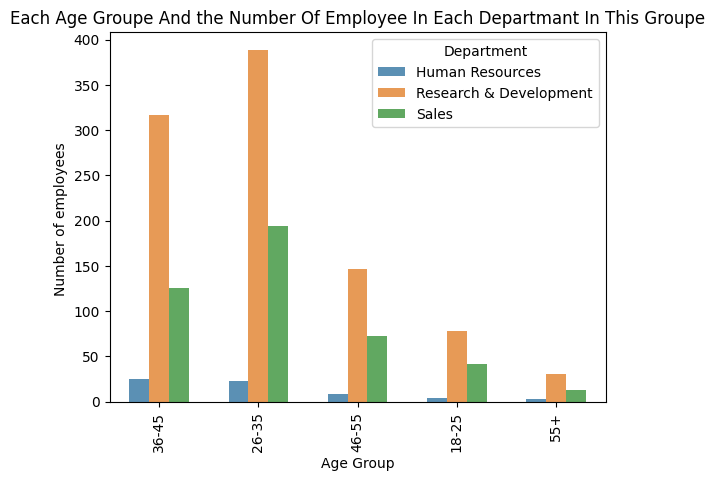

In [142]:
sns.barplot(data=Department_AgeGroup,x='AgeGroup',y='count',hue='Department',alpha=0.8,width=0.6)
plt.ylabel('Number of employees ')
plt.xlabel('Age Group')
plt.title('Each Age Groupe And the Number Of Employee In Each Departmant In This Groupe')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

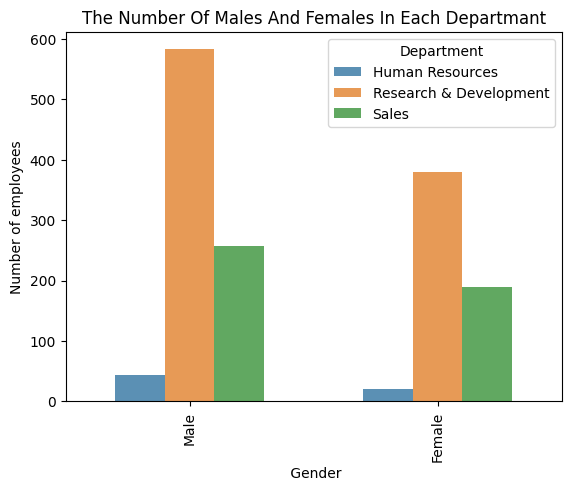

In [146]:

sns.barplot(data=Department_Gender,x='Gender',y='count',hue='Department',alpha=0.8,width=0.6) 
plt.title('The Number Of Males And Females In Each Departmant')
plt.xlabel(' Gender')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Married'), Text(1, 0, 'Divorced'), Text(2, 0, 'Single')])

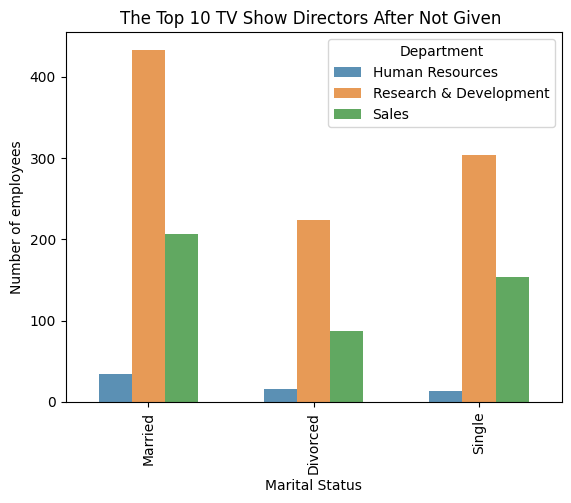

In [152]:
sns.barplot(data=Department_MaritalStatus,x='MaritalStatus',y='count',hue='Department', alpha=0.8,width=0.6) 
plt.title('The Top 10 TV Show Directors After Not Given ')
plt.xlabel('Marital Status')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

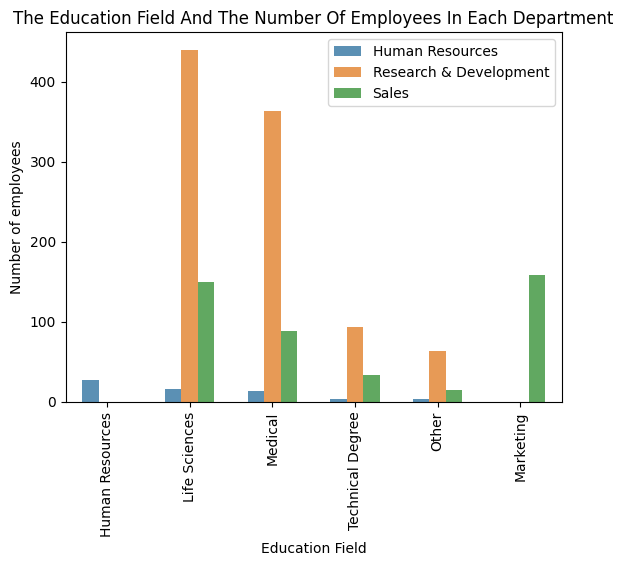

In [154]:
sns.barplot(data=Department_EducationField,x='EducationField',y='count',hue='Department', alpha=0.8,width=0.6) 
plt.title('The Education Field And The Number Of Employees In Each Department')
plt.xlabel('Education Field')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

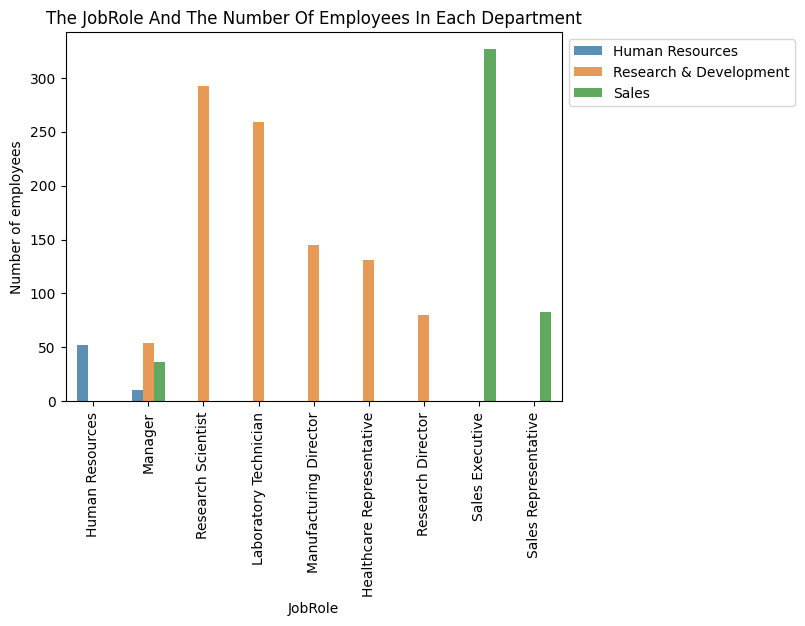

In [167]:
sns.barplot(data=Department_JobRole,x='JobRole',y='count',hue='Department', alpha=0.8,width=0.6) 
plt.title('The JobRole And The Number Of Employees In Each Department')
plt.xlabel('JobRole')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

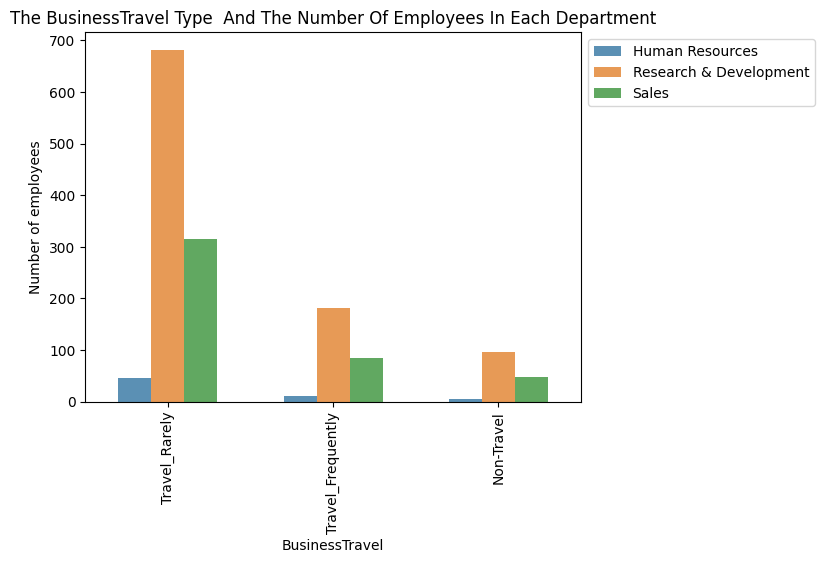

In [170]:
sns.barplot(data=Department_BusinessTravel,x='BusinessTravel',y='count',hue='Department', alpha=0.8,width=0.6) 
plt.title('The BusinessTravel Type  And The Number Of Employees In Each Department')
plt.xlabel('BusinessTravel')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

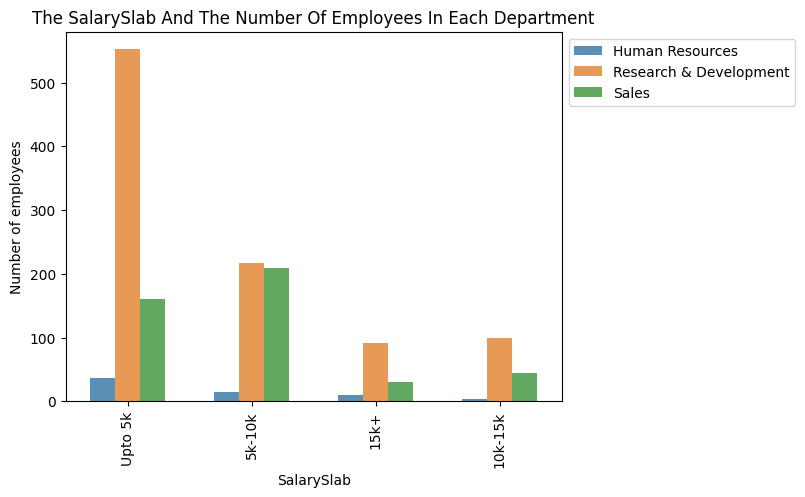

In [177]:
sns.barplot(data=Department_SalarySlab,x='SalarySlab',y='count',hue='Department', alpha=0.8,width=0.6) 
plt.title('The SalarySlab And The Number Of Employees In Each Department')
plt.xlabel('SalarySlab')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

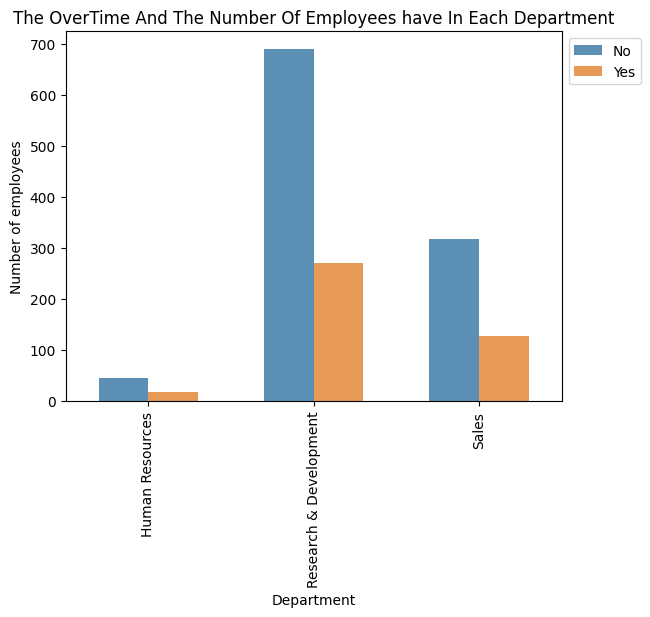

In [183]:
sns.barplot(data=Department_OverTime,x='Department',y='count',hue='OverTime', alpha=0.8,width=0.6) 
plt.title('The OverTime And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [179]:
fig=px.bar(DistanceFromHome_count,x='DistanceFromHome',y='count',title='The Distance FromHome and The Number of Employees in This Group')
fig.show()

In [181]:
fig = px.pie(EnvironmentSatisfaction_count, values='count', names='EnvironmentSatisfaction',title='Environment Satisfaction And Number of Employee works ')
fig.show()

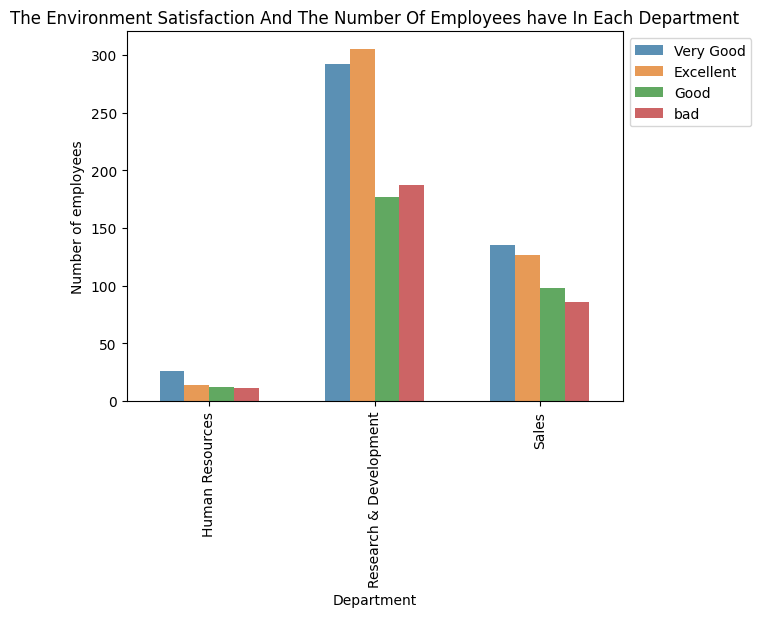

In [185]:
sns.barplot(data=Department_EnvironmentSatisfaction,x='Department',y='count',hue='EnvironmentSatisfaction', alpha=0.8,width=0.6) 
plt.title('The Environment Satisfaction And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [188]:
fig = px.pie(Gender_count, values='count', names='Gender',title='Gender And Number of Employee works ')
fig.show()

In [187]:
fig = px.pie(MaritalStatus_count, values='count', names='MaritalStatus',title='Marital Status And Number of Employee works ')
fig.show()

In [190]:
fig = px.pie(JobRole_count, values='count', names='JobRole',title='JobRole And Number of Employee works ')
fig.show()

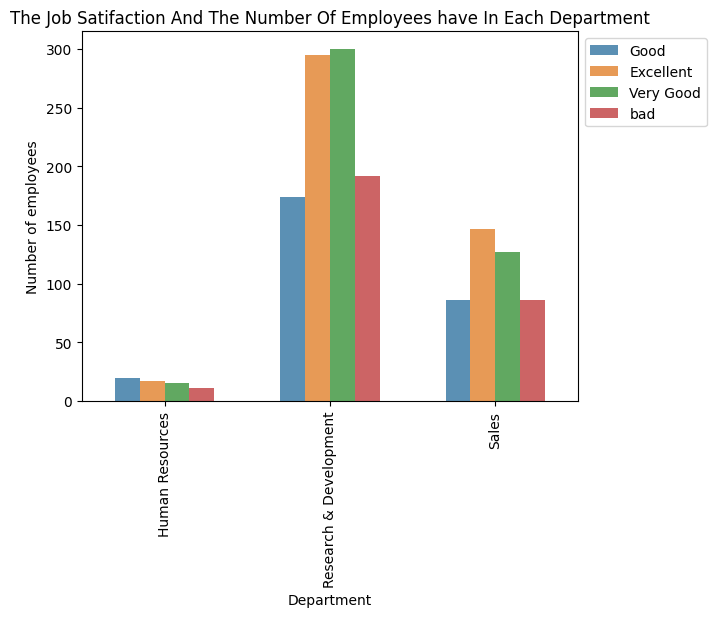

In [192]:
sns.barplot(data=Department_JobSatisfaction,x='Department',y='count',hue='JobSatisfaction', alpha=0.8,width=0.6) 
plt.title('The Job Satifaction And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [196]:
fig = px.pie(OverTime_count, values='count', names='OverTime',title=' OverTime And Number of Employee works ')
fig.show()

In [194]:
fig=px.bar(NumCompaniesWorked_count,x='NumCompaniesWorked',y='count',title='The Number of Companies Worked and The Number of Employees in This Group')
fig.show()

In [198]:
fig=px.bar(PercentSalaryHike_count,x='PercentSalaryHike',y='count',title='The Percent SalaryHike  of Employees ')
fig.show()

In [201]:
fig = px.pie(PerformanceRating_count, values='count', names='PerformanceRating',title='Performance Rating And Number of Employees ')
fig.show()

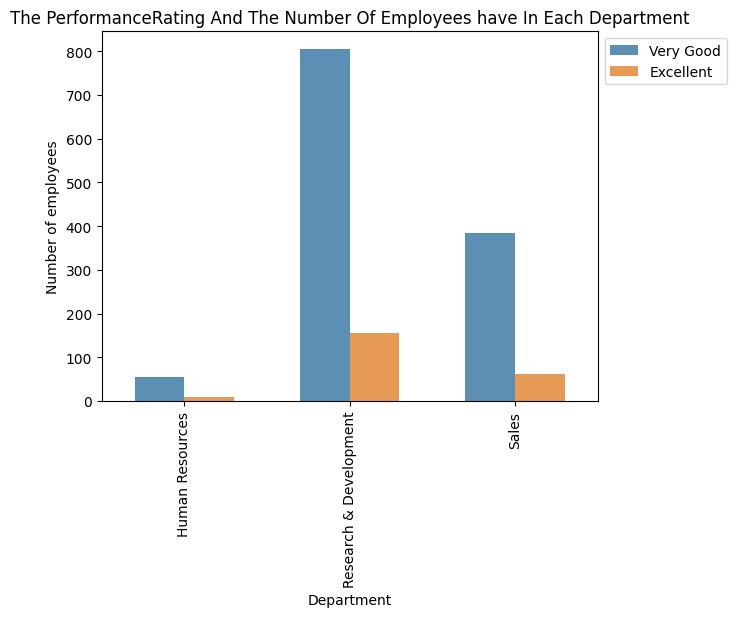

In [203]:
sns.barplot(data=Department_PerformanceRating,x='Department',y='count',hue='JobSatisfaction', alpha=0.8,width=0.6) 
plt.title('The PerformanceRating And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [206]:
fig = px.pie(RelationshipSatisfaction_count, values='count', names='RelationshipSatisfaction',title='Relationship Satisfaction And Number of Employees ')
fig.show()

In [208]:
fig = px.pie(StockOptionLevel_count, values='count', names='StockOptionLevel',title='Stock OptionLevel And Number of Employees ')
fig.show()

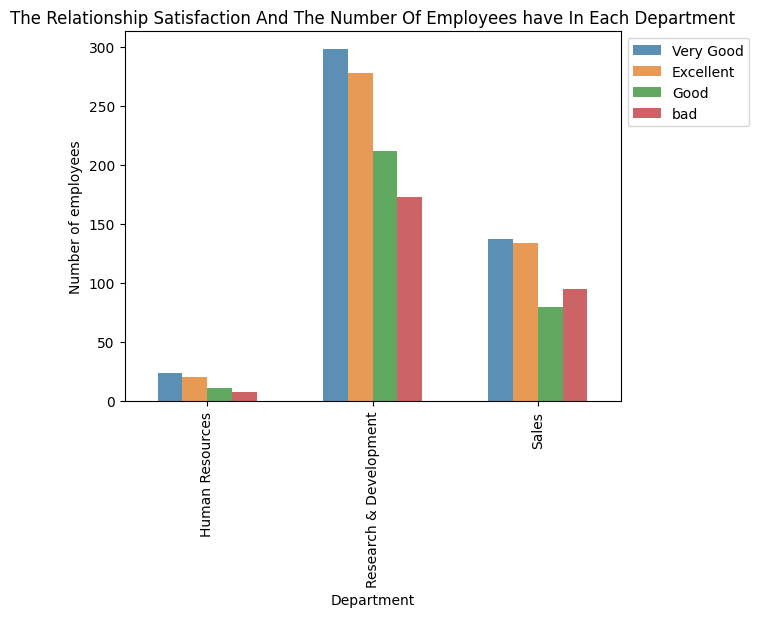

In [210]:
sns.barplot(data=Department_RelationshipSatisfaction,x='Department',y='count',hue='RelationshipSatisfaction', alpha=0.8,width=0.6) 
plt.title('The Relationship Satisfaction And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

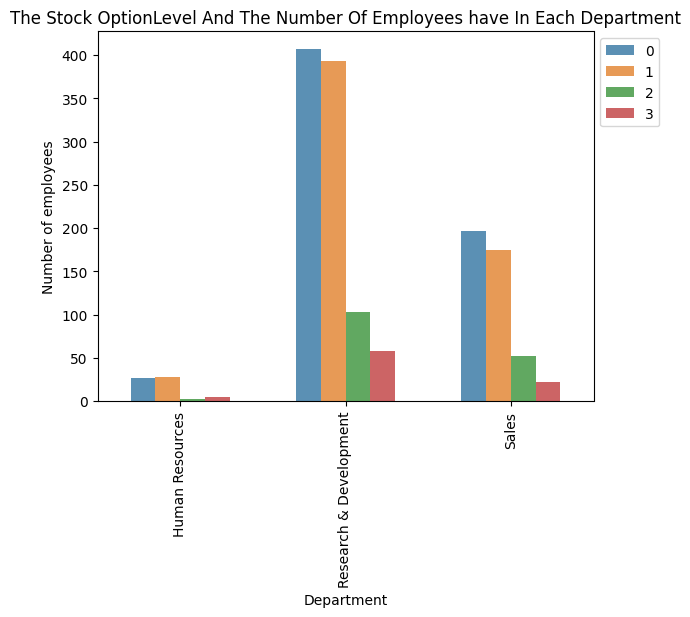

In [211]:
sns.barplot(data=Department_StockOptionLevel,x='Department',y='count',hue='StockOptionLevel', alpha=0.8,width=0.6) 
plt.title('The Stock OptionLevel And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [213]:
fig = px.pie(TrainingTimesLastYear_count, values='count', names='TrainingTimesLastYear',title='TrainingTimesLastYear And Number of Employees ')
fig.show()

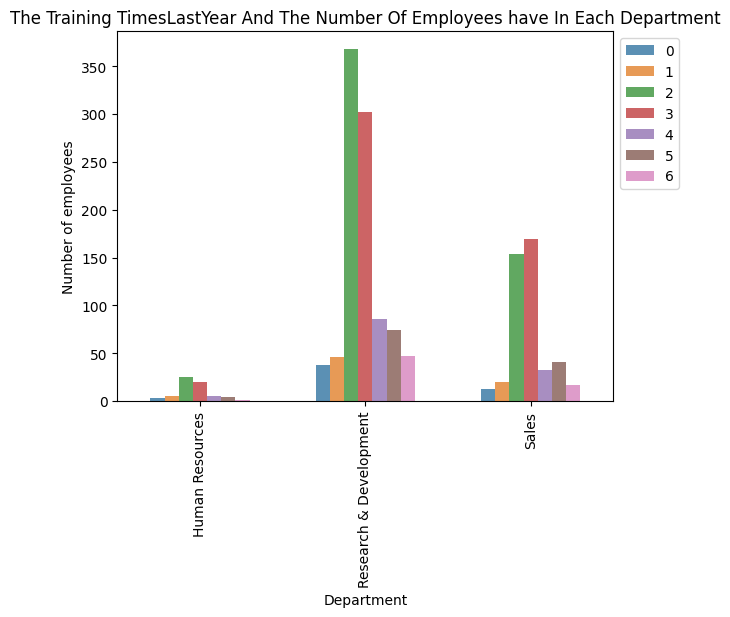

In [215]:
sns.barplot(data=Department_TrainingTimesLastYear,x='Department',y='count',hue='TrainingTimesLastYear', alpha=0.8,width=0.6) 
plt.title('The Training TimesLastYear And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [217]:
fig = px.pie(WorkLifeBalance_count, values='count', names='WorkLifeBalance',title='WorkLife Balance And Number of Employees ')
fig.show()

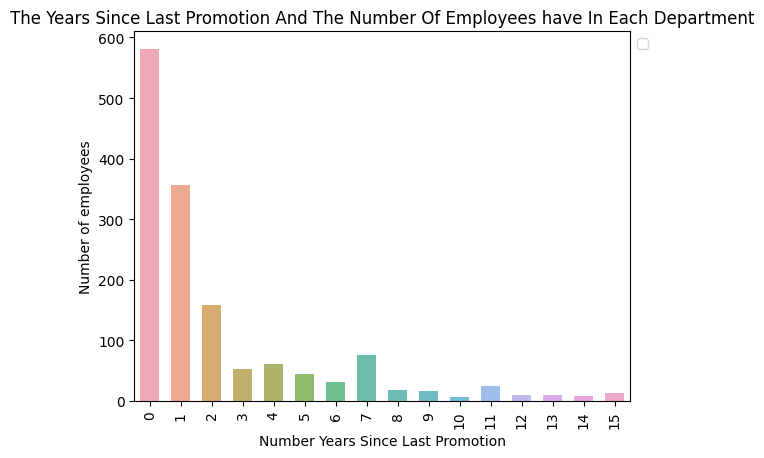

In [219]:
sns.barplot(data=YearsSinceLastPromotion_count,x='YearsSinceLastPromotion',y='count', alpha=0.8,width=0.6) 
plt.title('The Years Since Last Promotion And The Number Of Employees have In Each Department')
plt.xlabel('Number Years Since Last Promotion')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

In [220]:
df.to_csv("data_HR.csv")